In [2]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Carregando os dados

In [8]:
# carregando os dados 
my_data = np.array(np.genfromtxt('data/breast-cancer-wisconsin.data.txt', delimiter=','), dtype='float64')
# no exemplo da internet ele usava esse StandardScaler (não sei pra que serve)
# scaler = StandardScaler()
# my_data = scaler.fit_transform(my_data)
y = my_data[:,-1:].astype(int).ravel()
X = my_data[:,1:-1]
X[np.isnan(X) == True] = 0
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

## SVM com kernel linear

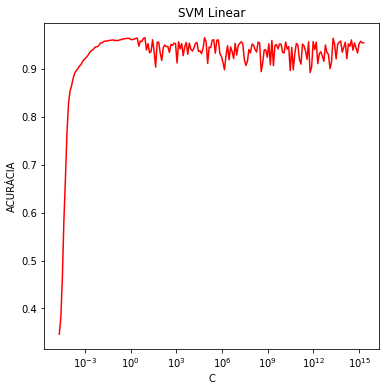

Maior acurácia: 0.9652380952380952 referente ao C: 8.495143105073806


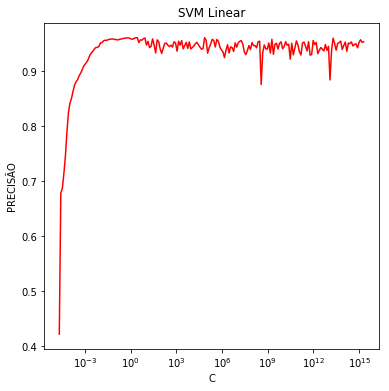

Maior precisão: 0.9609109429886677 referente ao C: 2.6709031258598004


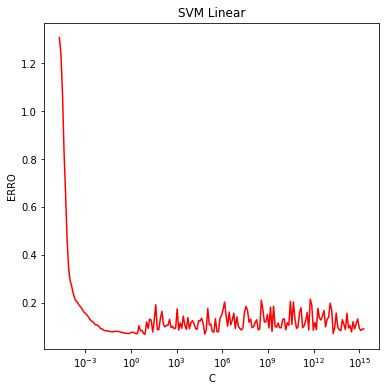

Menor erro: 0.06952380952380953 referente ao C: 8.495143105073806

Tempo médio de fit: 6.899272680282593 milissegundos


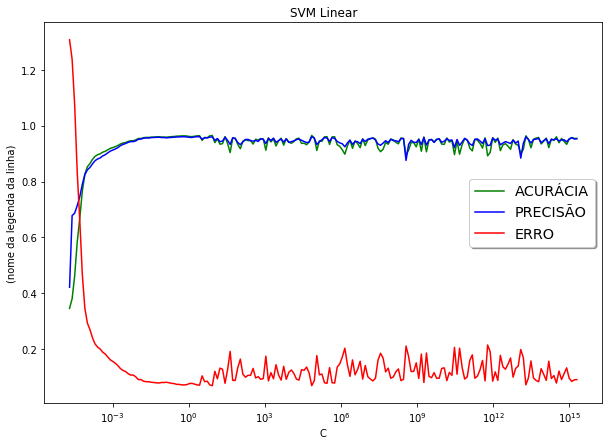

Maior acurácia: 0.9652380952380952 referente ao C: 8.495143105073806
Maior precisão: 0.9609109429886677 referente ao C: 2.6709031258598004
Menor erro: 0.06952380952380953 referente ao C: 8.495143105073806

Tempo médio de fit: 6.899272680282593 milissegundos


In [9]:
C_range = 2*np.logspace(-5, 15, 200)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
grid = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=cv, scoring=["precision_macro","accuracy","neg_mean_absolute_error"],refit=False, return_train_score=False)
grid.fit(X, y)

accur_lin = grid.cv_results_["mean_test_accuracy"]
precis_lin = grid.cv_results_['mean_test_precision_macro']
error_lin = -grid.cv_results_['mean_test_neg_mean_absolute_error']

ax = plt.figure(1, figsize=(6,6)).gca()
plt.plot(C_range,accur_lin, "r-")
plt.ylabel("ACURÁCIA")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM Linear")
plt.show()
C_accur_best_lin = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best_lin = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best_lin,"referente ao C:", C_accur_best_lin )

ax = plt.figure(1, figsize=(6,6)).gca()
plt.plot(C_range,precis_lin, "r-")
plt.ylabel("PRECISÃO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM Linear")
plt.show()
C_prec_best_lin = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best_lin = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best_lin,"referente ao C:", C_prec_best_lin )

ax = plt.figure(1, figsize=(6,6)).gca()
plt.plot(C_range,error_lin, "r-")
plt.ylabel("ERRO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM Linear")
plt.show()
C_error_best_lin = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best_lin = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best_lin,"referente ao C:", C_error_best_lin )

print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

############################### GRÁFICO UNIFICADO ####################################

ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,accur_lin, "g-", label='ACURÁCIA')
plt.plot(C_range,precis_lin, "b-", label='PRECISÃO')
plt.plot(C_range,error_lin, "r-", label='ERRO')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM Linear")
plt.show()
C_accur_best_lin = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best_lin = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best_lin,"referente ao C:", C_accur_best_lin )
C_prec_best_lin = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best_lin = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best_lin,"referente ao C:", C_prec_best_lin )
C_error_best_lin = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best_lin = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best_lin,"referente ao C:", C_error_best_lin )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

In [4]:
# Repita para um kernel gaussiano, e com σ fixo
# Essa parte tá complicada porque aparentemente não tem nenhum kernel com esse nome no scikit learn
# li na internet que o kernel "rbf" é gaussiano 
# mas o próximo item do trabalho é pedindo pra fazer com kernel "fbr"
# que eu suponho que seja a tradução pra português de rbf. 
# também não sei oq significa esse σ fixo

#outras opções de kernel que achei na internet foram: polynomial e sigmoid.

### SVM com kernel FBR

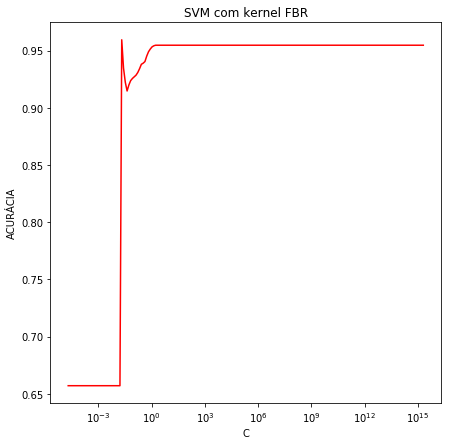

Maior acurácia: 0.9595238095238096 referente ao C: 0.020706436865913252


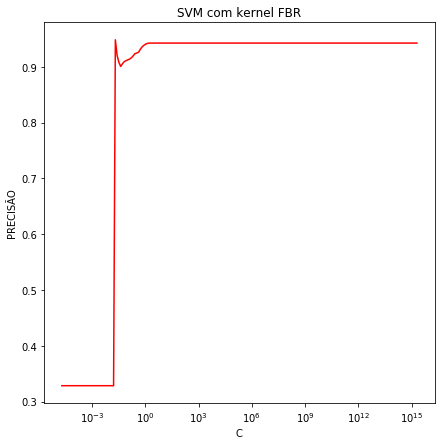

Maior precisão: 0.9485398314918927 referente ao C: 0.020706436865913252


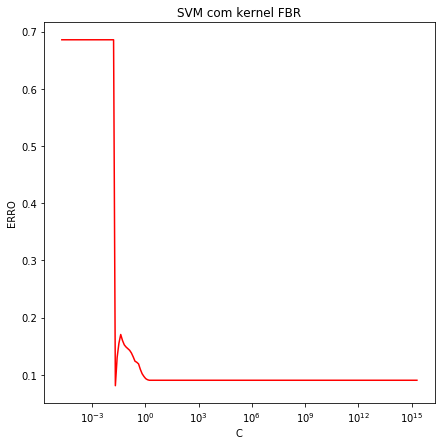

Menor erro: 0.08095238095238096 referente ao C: 0.020706436865913252

Tempo médio de fit: 5.306303143501282 milissegundos


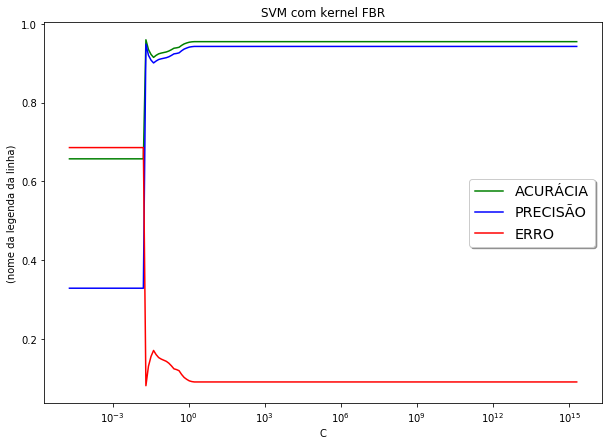

Maior acurácia: 0.9595238095238096 referente ao C: 0.020706436865913252
Maior precisão: 0.9485398314918927 referente ao C: 0.020706436865913252
Menor erro: 0.08095238095238096 referente ao C: 0.020706436865913252

Tempo médio de fit: 5.306303143501282 milissegundos


In [11]:

C_range = 2*np.logspace(-5, 15, 200)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
grid = GridSearchCV(svm.SVC(kernel="rbf"), param_grid=param_grid, cv=cv, scoring=["precision_macro","accuracy","neg_mean_absolute_error"],refit=False, return_train_score=False)
grid.fit(X, y)

accur_fbr = grid.cv_results_["mean_test_accuracy"]
precis_fbr = grid.cv_results_['mean_test_precision_macro']
error_fbr = -grid.cv_results_['mean_test_neg_mean_absolute_error']

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,accur_fbr, "r-")
plt.ylabel("ACURÁCIA")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel FBR")
plt.show()
C_accur_best_fbr = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best_fbr = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best_fbr,"referente ao C:", C_accur_best_fbr )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,precis_fbr, "r-")
plt.ylabel("PRECISÃO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel FBR")
plt.show()
C_prec_best_fbr = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best_fbr = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best_fbr,"referente ao C:", C_prec_best_fbr )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,error_fbr, "r-")
plt.ylabel("ERRO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel FBR")
plt.show()
C_error_best_fbr = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best_fbr = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best_fbr,"referente ao C:", C_error_best_fbr )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

############################### GRÁFICO UNIFICADO ####################################

ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,accur_fbr, "g-", label='ACURÁCIA')
plt.plot(C_range,precis_fbr, "b-", label='PRECISÃO')
plt.plot(C_range,error_fbr, "r-", label='ERRO')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel FBR")
plt.show()
C_accur_best_fbr = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best_fbr = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best_fbr,"referente ao C:", C_accur_best_fbr )
C_prec_best_fbr = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best_fbr = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best_fbr,"referente ao C:", C_prec_best_fbr )
C_error_best_fbr = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best_fbr = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best_fbr,"referente ao C:", C_error_best_fbr )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

## SVM com kernel Polinomial

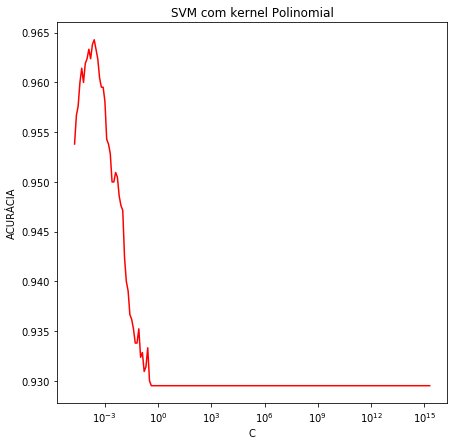

Maior acurácia: 0.9642857142857143 referente ao C: 0.00025501024814260256


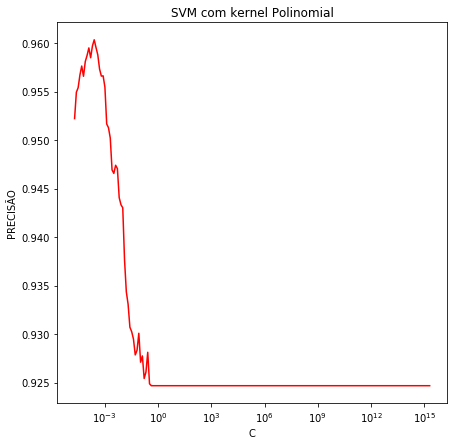

Maior precisão: 0.9603433826074558 referente ao C: 0.00025501024814260256


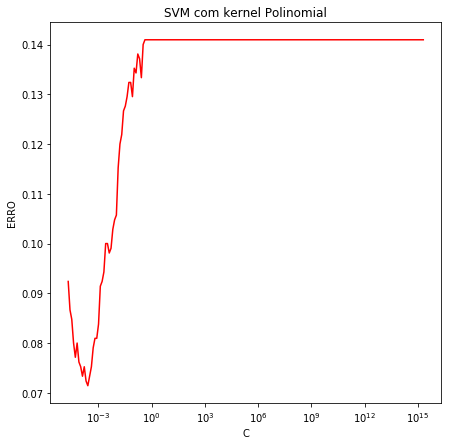

Menor erro: 0.07142857142857142 referente ao C: 0.00025501024814260256

Tempo médio de fit: 7.201923847198485 milissegundos


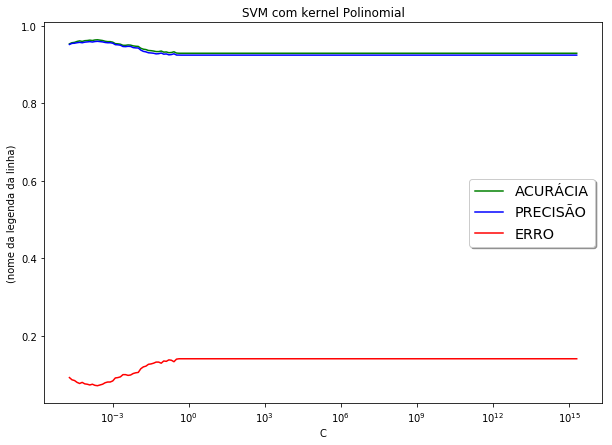

Maior acurácia: 0.9642857142857143 referente ao C: 0.00025501024814260256
Maior precisão: 0.9603433826074558 referente ao C: 0.00025501024814260256
Menor erro: 0.07142857142857142 referente ao C: 0.00025501024814260256

Tempo médio de fit: 7.201923847198485 milissegundos


In [13]:
C_range = 2*np.logspace(-5, 15, 200)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
grid = GridSearchCV(svm.SVC(kernel="poly", coef0=1.0), param_grid=param_grid, cv=cv, scoring=["precision_macro","accuracy","neg_mean_absolute_error"],refit=False, return_train_score=False)
grid.fit(X, y)


accur_poly = grid.cv_results_["mean_test_accuracy"]
precis_poly = grid.cv_results_['mean_test_precision_macro']
error_poly = -grid.cv_results_['mean_test_neg_mean_absolute_error']

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,accur_poly, "r-")
plt.ylabel("ACURÁCIA")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Polinomial")
plt.show()
C_accur_best_poly = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best_poly = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best_poly,"referente ao C:", C_accur_best_poly )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,precis_poly, "r-")
plt.ylabel("PRECISÃO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Polinomial")
plt.show()
C_prec_best_poly = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best_poly = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best_poly,"referente ao C:", C_prec_best_poly )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,error_poly, "r-")
plt.ylabel("ERRO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Polinomial")
plt.show()
C_error_best_poly = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best_poly = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best_poly,"referente ao C:", C_error_best_poly )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

############################### GRÁFICO UNIFICADO ####################################

ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,accur_poly, "g-", label='ACURÁCIA')
plt.plot(C_range,precis_poly, "b-", label='PRECISÃO')
plt.plot(C_range,error_poly, "r-", label='ERRO')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Polinomial")
plt.show()
C_accur_best_poly = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best_poly = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best_poly,"referente ao C:", C_accur_best_poly )
C_prec_best_poly = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best_poly = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best_poly,"referente ao C:", C_prec_best_poly )
C_error_best_poly = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best_poly = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best_poly,"referente ao C:", C_error_best_poly )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

## SVM com kernel Sigmóide

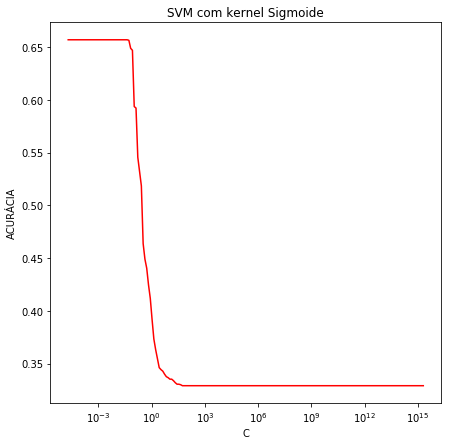

Maior acurácia: 0.6571428571428571 referente ao C: 2e-05


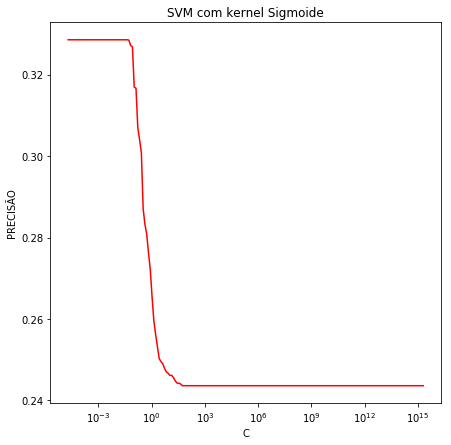

Maior precisão: 0.32857142857142857 referente ao C: 2e-05


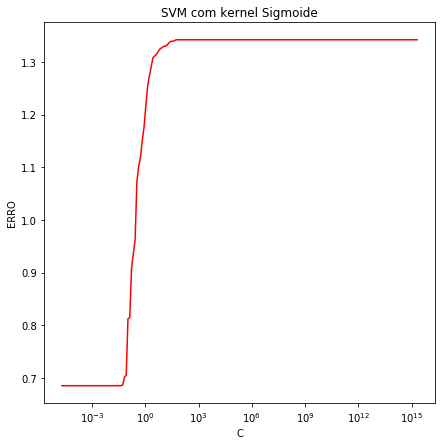

Menor erro: 0.6857142857142857 referente ao C: 2e-05

Tempo médio de fit: 7.621333599090576 milissegundos


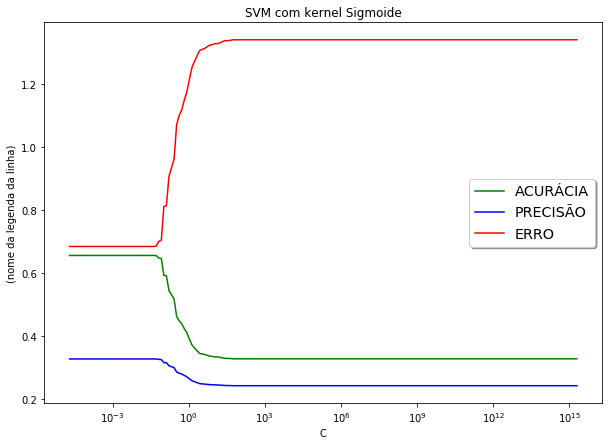

Maior acurácia: 0.6571428571428571 referente ao C: 2e-05
Maior precisão: 0.32857142857142857 referente ao C: 2e-05
Menor erro: 0.6857142857142857 referente ao C: 2e-05

Tempo médio de fit: 7.621333599090576 milissegundos


In [12]:
C_range = 2*np.logspace(-5, 15, 200)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
grid = GridSearchCV(svm.SVC(kernel="sigmoid"), param_grid=param_grid, cv=cv, scoring=["precision_macro","accuracy","neg_mean_absolute_error"],refit=False, return_train_score=False)
grid.fit(X, y)


accur_sig = grid.cv_results_["mean_test_accuracy"]
precis_sig = grid.cv_results_['mean_test_precision_macro']
error_sig = -grid.cv_results_['mean_test_neg_mean_absolute_error']

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,accur_sig, "r-")
plt.ylabel("ACURÁCIA")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Sigmoide")
plt.show()
C_accur_best_sig = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best_sig = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best_sig,"referente ao C:", C_accur_best_sig )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,precis_sig, "r-")
plt.ylabel("PRECISÃO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Sigmoide")
plt.show()
C_prec_best_sig = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best_sig = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best_sig,"referente ao C:", C_prec_best_sig )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,error_sig, "r-")
plt.ylabel("ERRO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Sigmoide")
plt.show()
C_error_best_sig = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best_sig = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best_sig,"referente ao C:", C_error_best_sig )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

############################### GRÁFICO UNIFICADO ####################################

ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,accur_sig, "g-", label='ACURÁCIA')
plt.plot(C_range,precis_sig, "b-", label='PRECISÃO')
plt.plot(C_range,error_sig, "r-", label='ERRO')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Sigmoide")
plt.show()
C_accur_best_sig = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best_sig = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best_sig,"referente ao C:", C_accur_best_sig )
C_prec_best_sig = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best_sig = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best_sig,"referente ao C:", C_prec_best_sig )
C_error_best_sig = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best_sig = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best_sig,"referente ao C:", C_error_best_sig )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

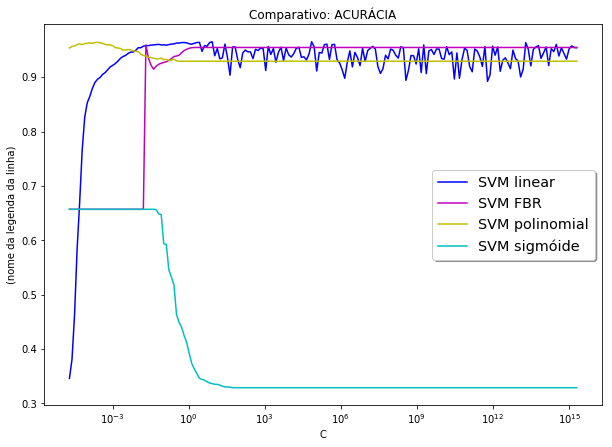

In [16]:
## Comparativo: ACURÁCIA
ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,accur_lin, "b-", label='SVM linear')
plt.plot(C_range,accur_fbr, "m-", label='SVM FBR')
plt.plot(C_range,accur_poly, "y-", label='SVM polinomial')
plt.plot(C_range,accur_sig, "c-", label='SVM sigmóide')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("Comparativo: ACURÁCIA")
plt.show()

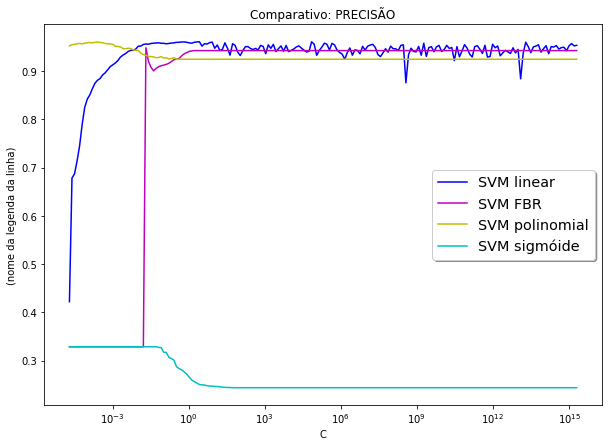

In [17]:
## Comparativo: PRECISÃO
ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,precis_lin, "b-", label='SVM linear')
plt.plot(C_range,precis_fbr, "m-", label='SVM FBR')
plt.plot(C_range,precis_poly, "y-", label='SVM polinomial')
plt.plot(C_range,precis_sig, "c-", label='SVM sigmóide')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("Comparativo: PRECISÃO")
plt.show()

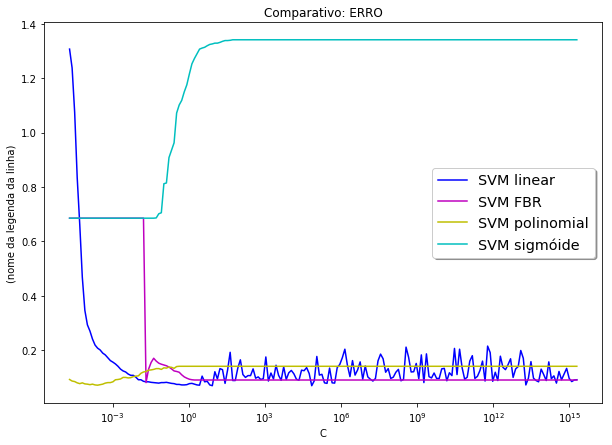

In [19]:
## Comparativo: ERRO
ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,error_lin, "b-", label='SVM linear')
plt.plot(C_range,error_fbr, "m-", label='SVM FBR')
plt.plot(C_range,error_poly, "y-", label='SVM polinomial')
plt.plot(C_range,error_sig, "c-", label='SVM sigmóide')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("Comparativo: ERRO")
plt.show()